In [1]:
import pandas
import matplotlib.pyplot as pyplot
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
year = "2019"

In [3]:
book_data = pandas.read_csv(f"./data/{year}.csv")

In [4]:
book_data["title"].count()

53

In [5]:
book_data["author"].drop_duplicates().count()

31

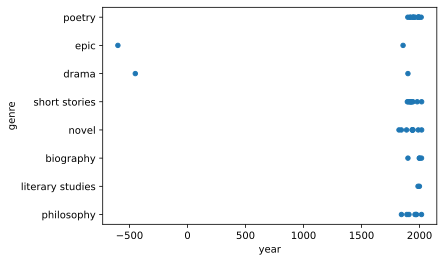

In [6]:
# Scatter of genre by time (all time)
_ = book_data.plot.scatter("year", "genre")

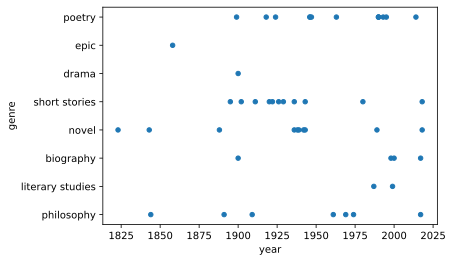

In [7]:
# Scatter of genre by time (AD)
_ = book_data[book_data["year"] > 0].plot.scatter("year", "genre")

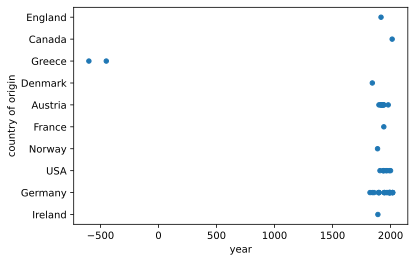

In [8]:
# Scatter of country of origin by time
_ = book_data.plot.scatter("year", "country of origin")

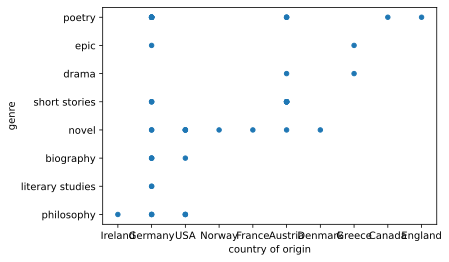

In [9]:
_ = book_data.plot.scatter("country of origin", "genre")

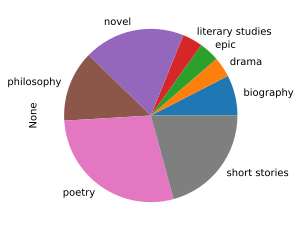

In [10]:
# Pie of genres
_ = book_data.groupby("genre").size().plot.pie()

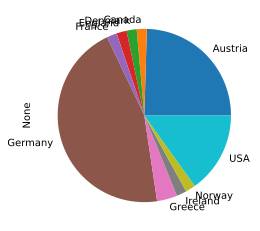

In [11]:
_ = book_data.groupby("country of origin").size().plot.pie()

In [12]:
top_authors = book_data.groupby("author").count().sort_values(by="title", ascending=False)
top_authors[top_authors["title"] > 1]["title"]

author
Stefan Zweig       9
Ayn Rand           5
Rolf Schilling     5
Hans Bethge        4
Theodor Däubler    2
Name: title, dtype: int64

In [13]:
book_data

,author,title,year,genre,country of origin
0,Oscar Wilde,The Soul of man under Socialism,1891.0,philosophy,Ireland
1,NaN,Nietzsche. Werk und Wirkungen,1974.0,philosophy,Germany
2,Christian Benne; Claus Zittel,Nietzsche und die Lyrik: Ein Kompendium,2017.0,philosophy,Germany
3,Ayn Rand,The Romantic Manifesto,1969.0,philosophy,USA
4,Ayn Rand,For the New Intellectual,1961.0,philosophy,USA
5,James Huneker,Egoists. A Book of Supermen,1909.0,philosophy,USA
6,Max Stirner,Der Einzige und sein Eigentum,1844.0,philosophy,Germany
7,NaN,George-Jahrbuch. Band 2,1999.0,literary studies,Germany
8,Marita Keilson-Lauritz,Von der Liebe die Freundschaft heißt,1987.0,literary studies,Germany
9,Hans Bethge,Hölderlin,1900.0,biography,Germany
